In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning

In [6]:
#drop last 3 cols
df.drop(columns= ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [7]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
#rename the columns
df.rename(columns={"v1":"target","v2":"text"},inplace = True)
df.sample(4)

,target,text
3446,ham,Sitting ard nothing to do lor. U leh busy w work?
3373,ham,Also andros ice etc etc
4043,ham,"Yes, my reg is Ciao!"
4010,spam,Please call our customer service representativ...


In [9]:
raw_df = df.copy()

In [10]:
#encode the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x18d9ef3f790>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

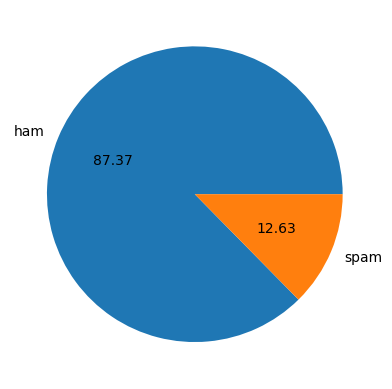

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [20]:
#so the data is imabalanced


In [21]:
import nltk

In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\SUMAN
[nltk_data]     MONDAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_chars']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df['num_sentences'].unique()

array([ 2,  1,  4,  5,  3,  6,  7, 11,  8,  9, 14, 38, 12, 10, 18, 13],
      dtype=int64)

In [29]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#for spam messages
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
#for ham messages
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_chars', ylabel='Count'>

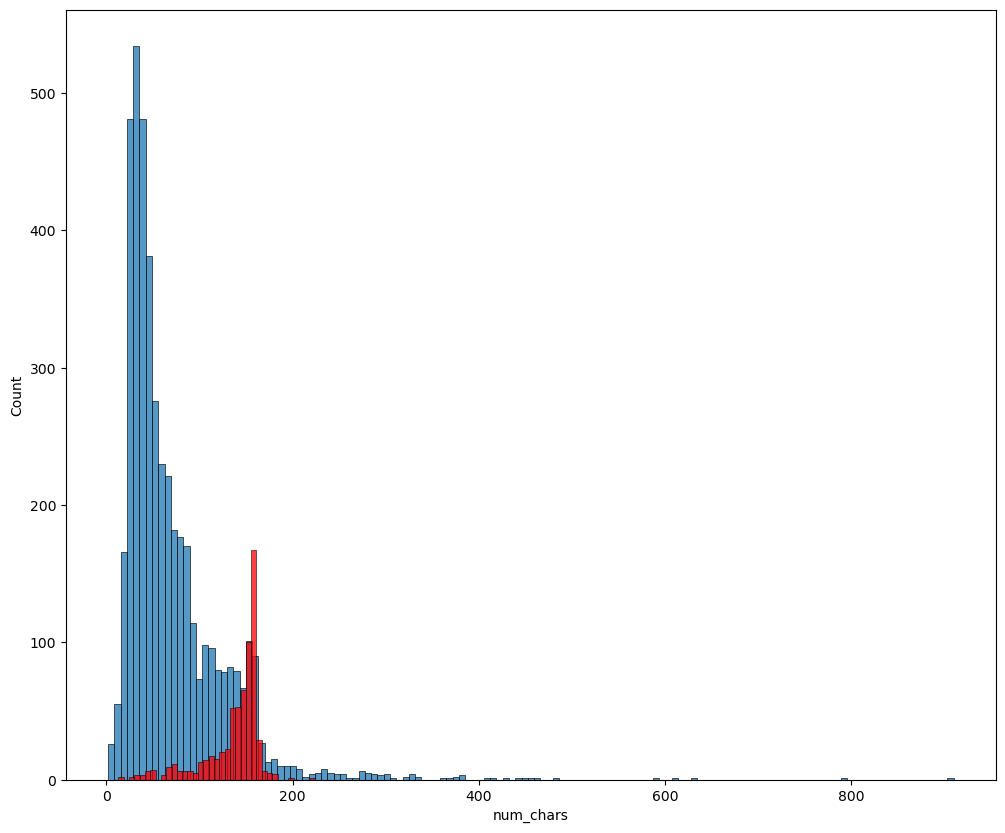

In [33]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_chars'])

sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

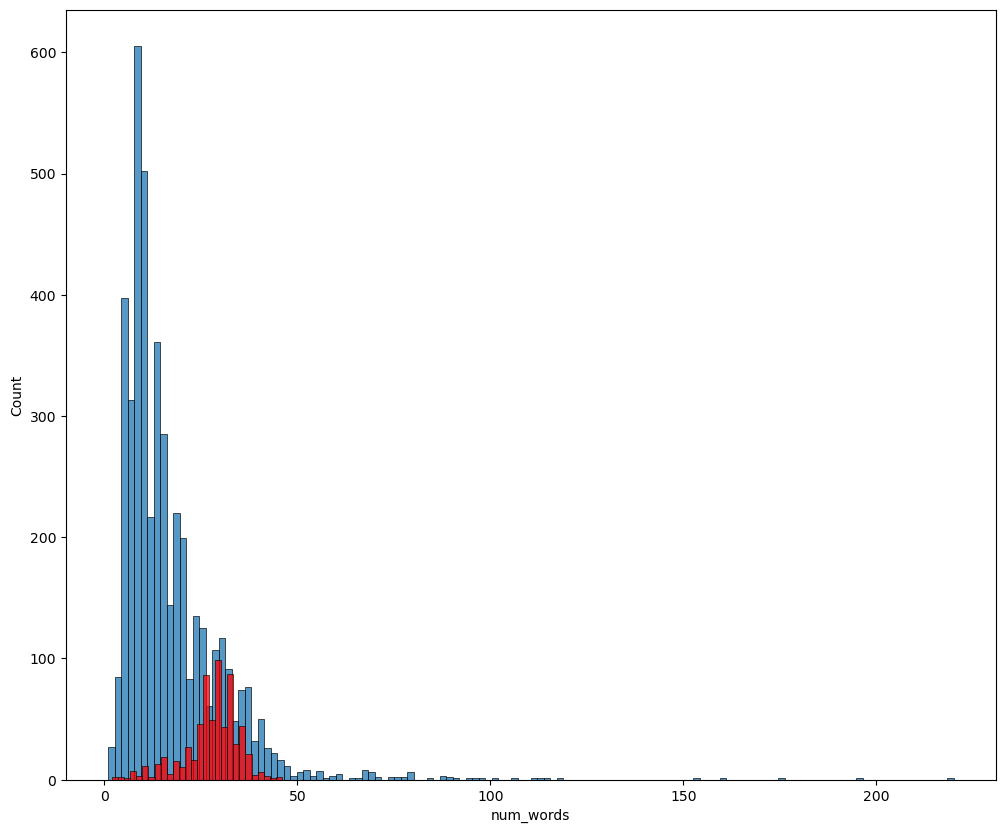

In [34]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_words'])

sns.histplot(df[df['target']==1]['num_words'],color='red')

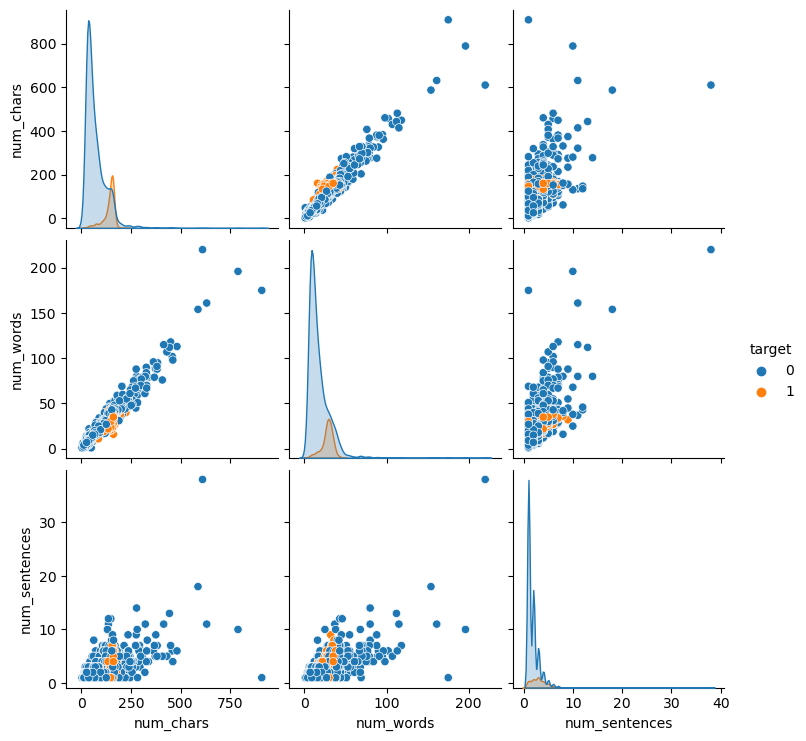

In [35]:
 sns.pairplot(df,hue="target")

In [36]:
df.corr()

C:\Users\SUMAN MONDAL\AppData\Local\Temp\ipykernel_20948\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\SUMAN MONDAL\AppData\Local\Temp\ipykernel_20948\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

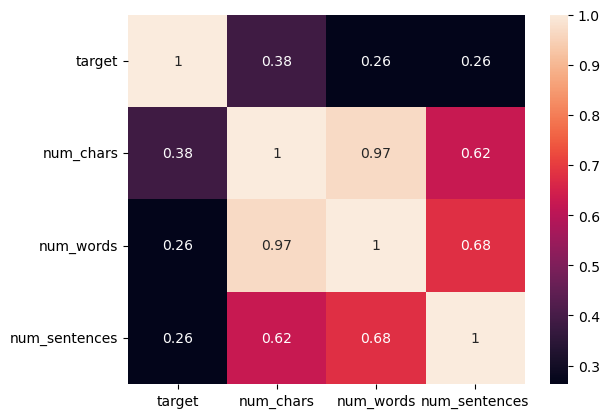

In [37]:
sns.heatmap(df.corr(),annot = True)

#high colinearity b/w num_chars,num_words,nums_sentences
that's why i will keep only 1 col num_chars becuase it has 
the highest correlation with the target

# Text cleaning


1.lowercase
2.tokenization
3.removing special characters
4.removing stop words and punctuation
5.stemming

In [38]:
 df['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [40]:
import string
import re

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SUMAN
[nltk_data]     MONDAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
def transform_text(text):
    #Convert text to lowercase
    text = text.lower()
    
    #Remove special chars
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    #Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

In [43]:
# Example usage
text = "Hello, world! This is a test #123. Running and jumping are fun!"
transformed = transform_text(text)
print(transformed)

['hello', 'world', 'test', '123', 'run', 'jump', 'fun']


In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size =10,background_color = 'white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))

In [47]:
#plt.imshow(spam_wc,)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=" "))

In [49]:
#plt.imshow(ham_wc,)

# top 50 words from spam and ham

In [50]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    if isinstance(msg, str):
        for word in msg.split():
            spam_corpus.append(word)
    elif isinstance(msg, list):
        spam_corpus.extend(msg)
    else:
        continue

In [51]:
len(spam_corpus)

10813

In [52]:
from collections import Counter


In [53]:
most_common_words = Counter(spam_corpus).most_common(30)
word_counts_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])


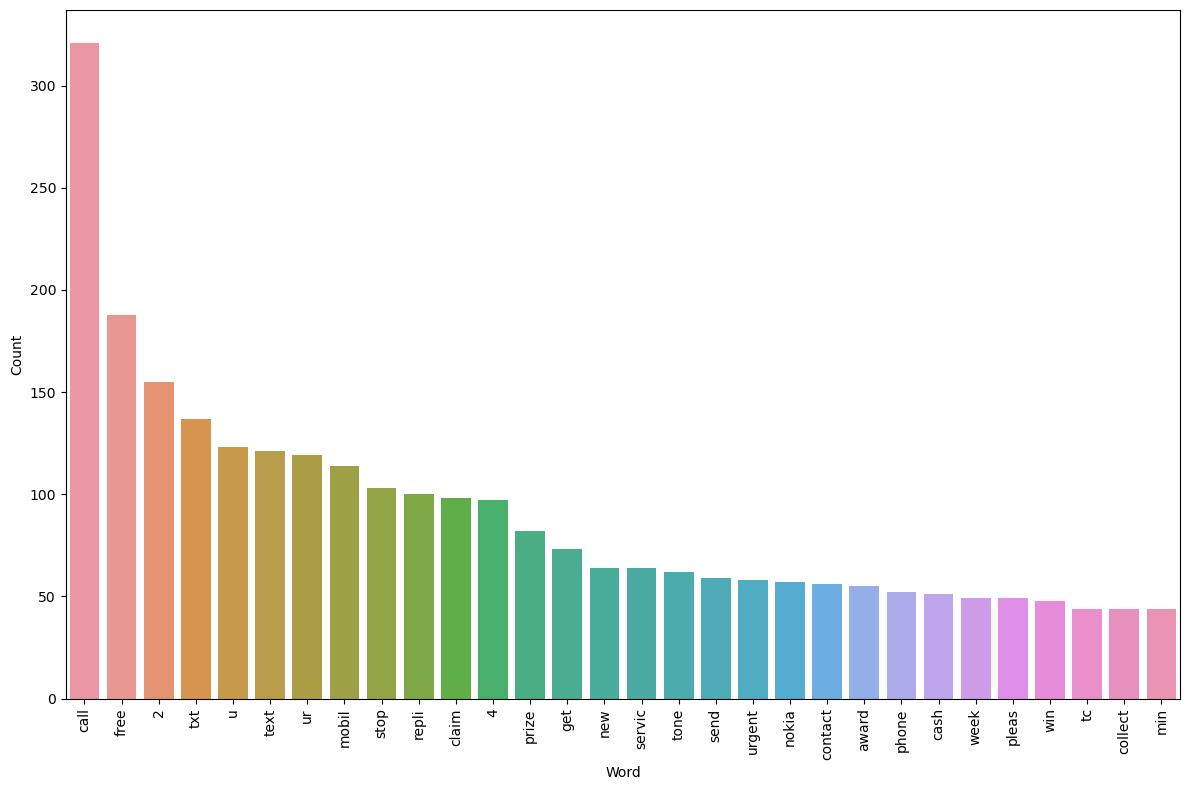

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.tight_layout() 

In [55]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    if isinstance(msg, str):
        for word in msg.split():
            ham_corpus.append(word)
    elif isinstance(msg, list):
        ham_corpus.extend(msg)
    else:
        continue

In [56]:
len(ham_corpus)

36813

In [57]:
most_common_ham_words = Counter(ham_corpus).most_common(30)
word_counts_df_ham = pd.DataFrame(most_common_ham_words, columns=['Word', 'Count'])


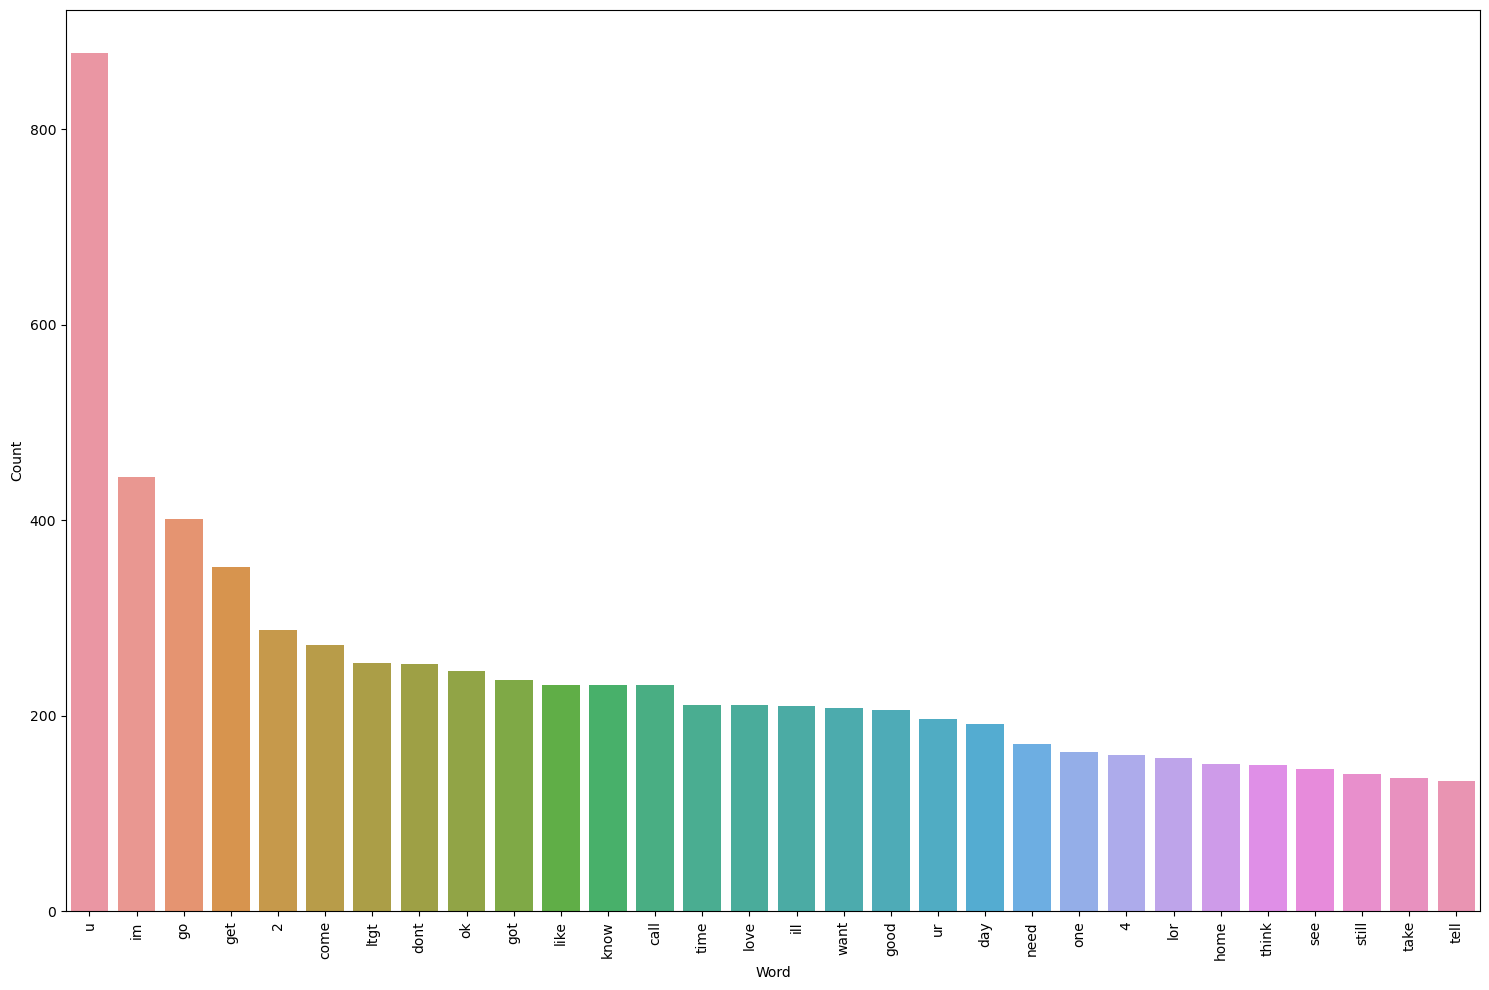

In [58]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Word', y='Count', data=word_counts_df_ham)
plt.xticks(rotation='vertical')
plt.tight_layout() 

In [59]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))


# Model Building


In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf  = TfidfVectorizer(max_features = 3000)
cv = CountVectorizer()

In [61]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [62]:
X.shape

(5169, 3000)

In [63]:
y = df['target'].values

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[771 118]
 [ 22 123]]
0.5103734439834025


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[889   0]
 [ 25 120]]
1.0


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[888   1]
 [ 26 119]]
0.9916666666666667


# so i choose tfidf -> MultinomialNB

In [71]:
import pickle

In [72]:
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))